<a href="https://colab.research.google.com/github/akshaytripathi09/FEMALE-BIRTH-PREDICTION-USING-ARIMA/blob/main/FEMALE_BIRTH_PREDICTION_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Forecasting the Female Births

Project description:

The problem is to forecast the daily number of female births in California. The dataset described a time-series of baby births in California over 12 months in 1959, and there are 365 observations.

Try it out with different Time series models and finally choose the best of it after comparison.           


# IMPORT LIBRARIES

## ARIMA

In [2]:
#pip install statsmodels

In [25]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

# UPLOAD GIVEN DATASET

In [6]:
female_birth_data = pd.read_csv("daily-total-female-births-CA.csv")

In [7]:
female_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
female_birth_data.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [9]:
female_birth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [10]:
birth_data = pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [11]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [12]:
birth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [13]:
birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


## FINDING OUTLIERS

## APPLYING DIFFERENT TYPES OF PLOTS..!

<Axes: >

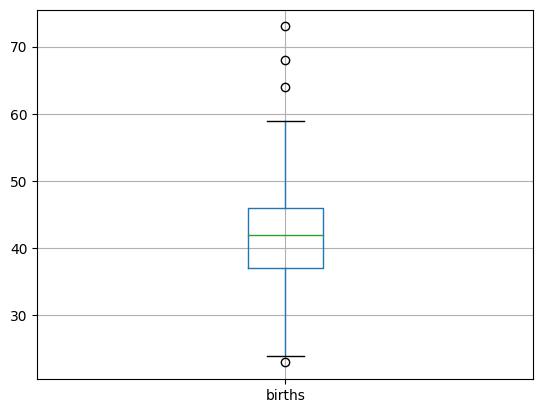

In [14]:
birth_data.boxplot()

<Axes: xlabel='date'>

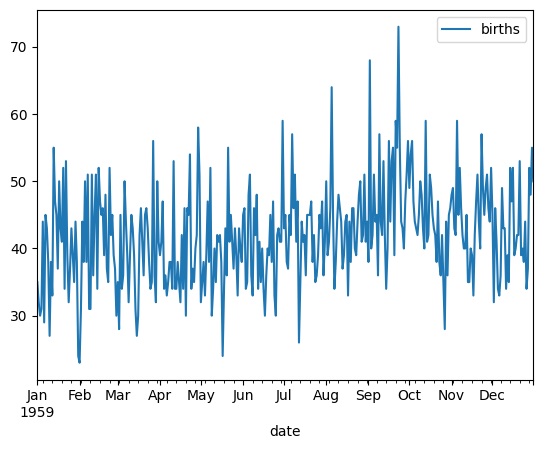

In [15]:
birth_data.plot() # Almost a stationary plot

####  ALSO CALLED AS SMOOTHING

In [16]:
moving_average_birth = birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic.

In [18]:
moving_average_birth.head(30)

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


<Axes: xlabel='date'>

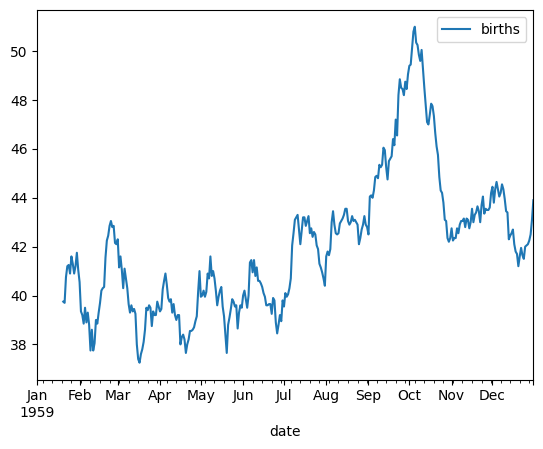

In [19]:
moving_average_birth.plot() #  we can see that there is a peak in the month of october

In [21]:
sm.stats.durbin_watson(birth_data) # Very less corelation

array([0.04624491])

### SHOW PLOTS IN THE NOTEBOOK

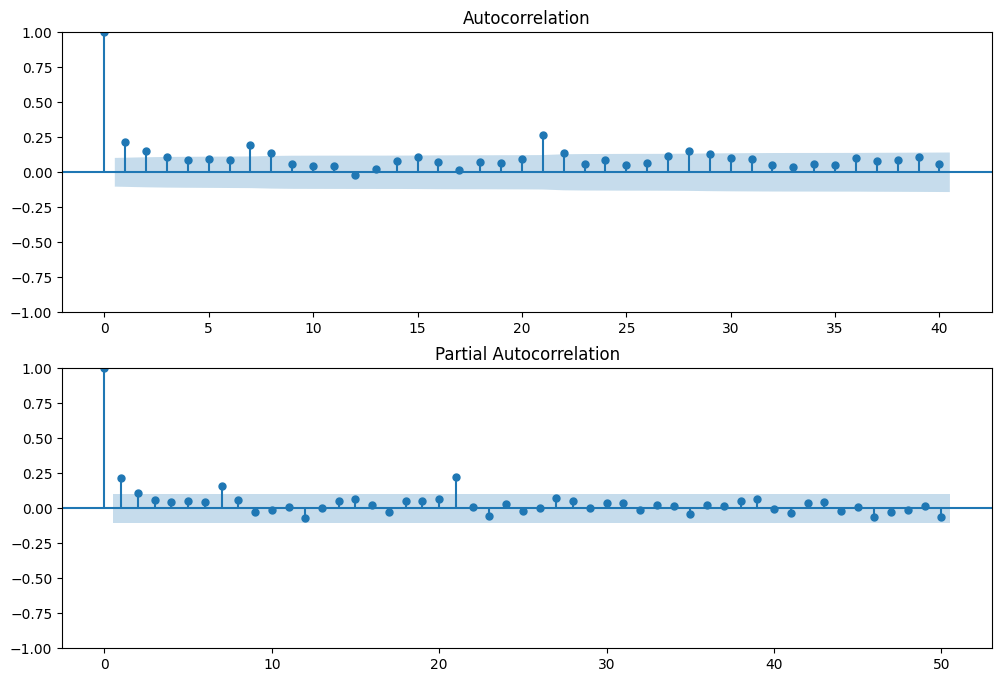

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=50, ax=ax2)

In [26]:
training_data = birth_data[0:320]
test_data = birth_data[320:]

In [27]:
t_x,t=train_test_split(birth_data)

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
arima = sm.tsa.arima.ARIMA(training_data, order=(2,1,3))

In [31]:
model = arima.fit()

### CALCULATION OF AIC (AKAIKE'S INFORMATION CRITERION.)

AIC=−2log(L)+2(p+q+k+1), AIC = − 2 log ⁡ ( L ) + 2 ( p + q + k + 1 ) , where L is the likelihood of the data, k=1 if c≠0 c ≠ 0 and k=0 if c=0 .

In [32]:
model.aic

2167.8472399195157

In [33]:
pred = model.forecast(steps = 45)

In [34]:
pred

1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580710
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581011
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580967
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580981
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.580981
1959-12-28    43

In [35]:
from sklearn.metrics import mean_squared_error


In [36]:
np.sqrt(mean_squared_error(test_data,pred))

6.536645045764678

### CALCULATION OF RMSE (ROOT MEAN SQUARED ERROR)

In [37]:

# Assuming Pred is your predictions and test_data is your actual test data
test_data = np.array([1, 2, 3, 4, 5])  # Example actual test data
Pred = np.array([1.2, 2.3, 2.9, 4.1, 5.2])  # Example predictions

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, Pred))
print("RMSE:", rmse)

RMSE: 0.19493588689617922
